# Recreate example script

Paper:
Victor Liu, Michelle Povinelli, and Shanhui Fan,
"Resonance-enhanced optical forces between coupled photonic crystal slabs",
Optics Express, Vol. 17, No. 24, 2009

[Link to paper](https://doi.org/10.1364/OE.17.021897)

In [1]:
%matplotlib notebook
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
# extra functions used for plotting, progress bars, etc.
import util

import S4

In [3]:
# create a simulation
S = S4.Simulation()
S.create_new()

# set the lattice and harmonics
S.set_lattice([[1.0, 0.0], [0.0, 0.0]])
S.set_num_g(27)

# define materials
S.add_material("Silicon", [12.0, 0.0])
S.add_material("Vacuum", [1.0, 0.0])
# add top layer
S.add_layer("AirAbove", 0.0, "Vacuum")
# add slabs
S.add_layer("Slab", 0.5, "Vacuum")
S.set_layer_pattern_rectangle("Slab", "Silicon", [0.0, 0.0], [0.25, 0.0])
# add a spacer
S.add_layer("Spacer", 0.65, "Vacuum")
# add slabs
S.add_layer("Slab2", 0.5, "Vacuum")
S.set_layer_pattern_rectangle("Slab2", "Silicon", [0.0, 0.0], [0.25, 0.0])
# add bottom layer
S.add_layer("AirBelow", 0.0, "Vacuum")
# set incident light
S.set_excitation_planewave([0.0, 0.0], [0.0, 0.0], [1.0, 0.0])
# set frequency
S.set_frequency(0.6306178089044143)
# gather data

# let's be smart and use a meshgrid
y = 0
xv, zv = np.meshgrid(np.arange(-0.5, 3.5, 0.02),
                     np.arange(-1, 2.65, 0.02),
                     sparse=False, indexing="ij")
nx = xv.shape[0]
nz = zv.shape[1]
print(xv.shape)
print(zv.shape)
field_array = np.zeros(shape=(nx, nz, 2, 3), dtype=np.complex128)
for i in range(nx):
    for j in range(nz):
        x = xv[i,j]
        z = zv[i,j]
        l_field = S.get_field_at_point(np.array([x, y, z]))
        field_array[i, j] = l_field
# for x in np.arange(-0.5, 3.5, 0.02):
#     for z in np.arange(-1, 2.65, 0.02):
#         l_field = S.get_field_at_point(np.array([x, 0.0, z]))
#         print(l_field)
# print("done")


(200, 183)
(200, 183)


# let's figure out what to plot now

<IPython.core.display.Javascript object>


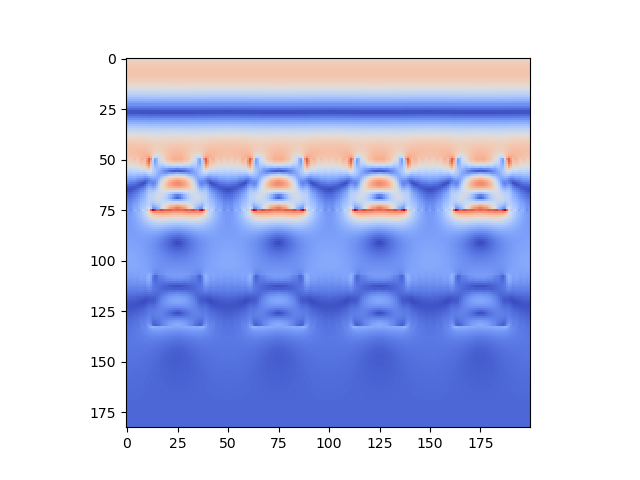

<IPython.core.display.Javascript object>


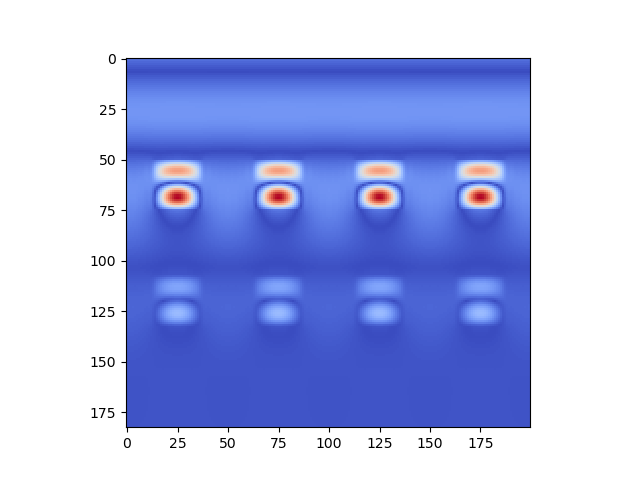

In [54]:
# because we are dealing with vectors, we'll plot the magnitudes
e_field = np.linalg.norm(field_array[:,:,0,:], axis=-1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(e_field.T, cmap="coolwarm")
plt.show()

h_field = np.linalg.norm(field_array[:,:,1,:], axis=-1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(h_field.T, cmap="coolwarm")
plt.show()

(200, 183, 3)


<IPython.core.display.Javascript object>


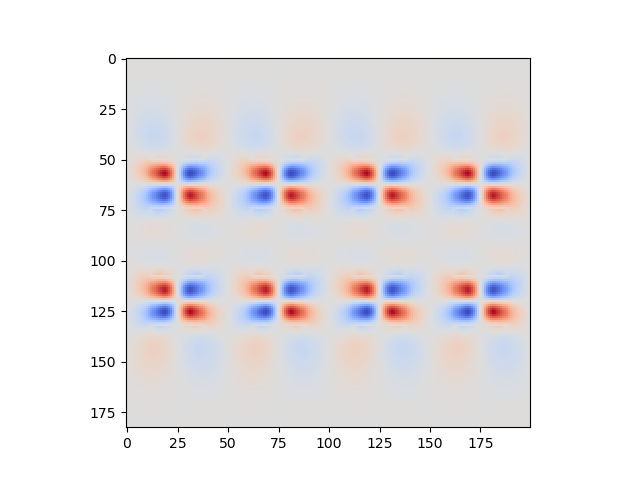

In [69]:
# because we are dealing with vectors, we'll plot the magnitudes
e_field = np.linalg.norm(field_array[:,:,0,:], axis=-1)
s_field = np.cross(0.5*field_array[:,:,0,:], np.conj(field_array[:,:,1,:]))
print(s_field.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.real(s_field[:,:,0]).T, cmap="coolwarm")
plt.show()

<IPython.core.display.Javascript object>


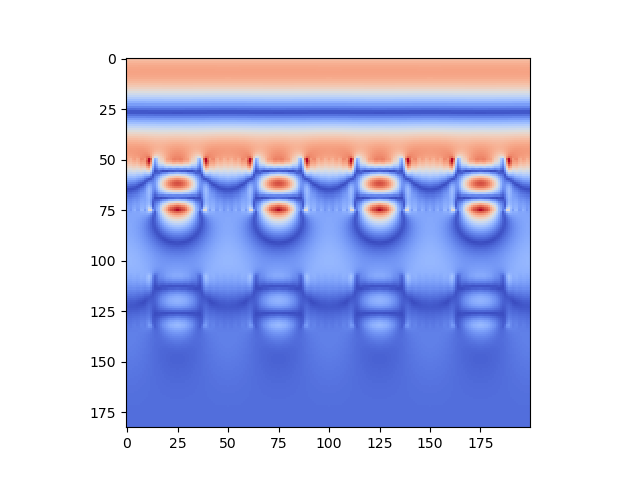

<IPython.core.display.Javascript object>


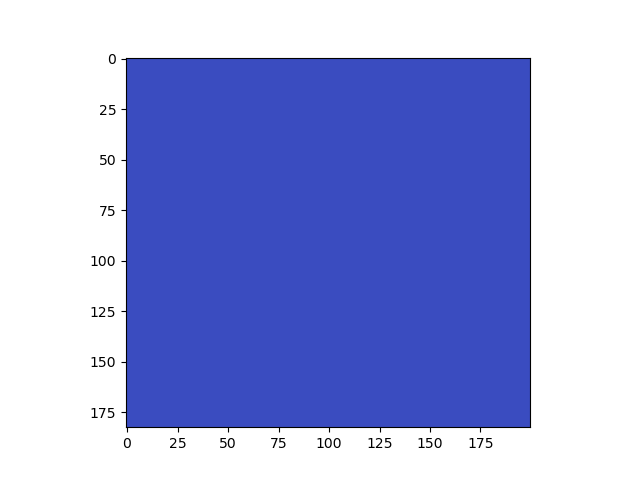

<IPython.core.display.Javascript object>


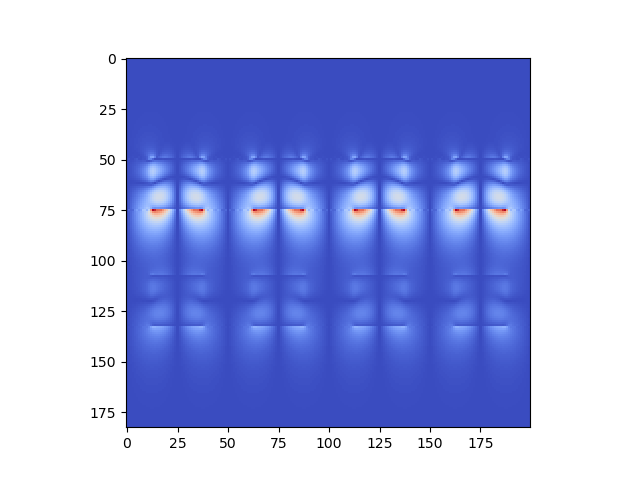

<IPython.core.display.Javascript object>


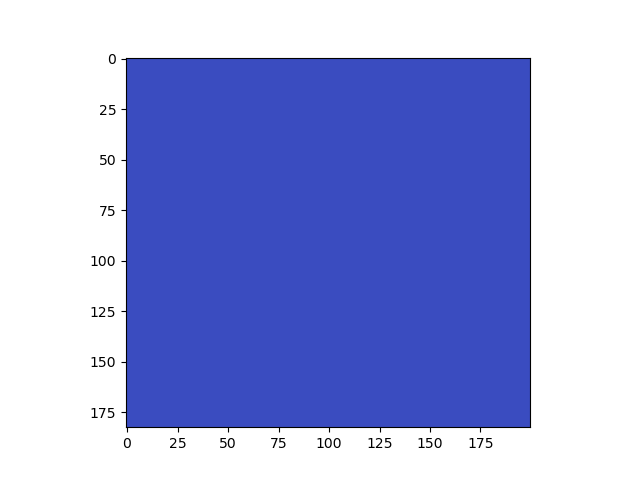

<IPython.core.display.Javascript object>


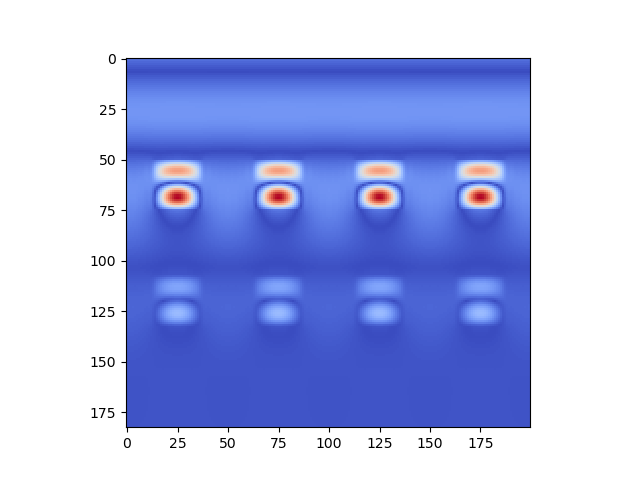

<IPython.core.display.Javascript object>


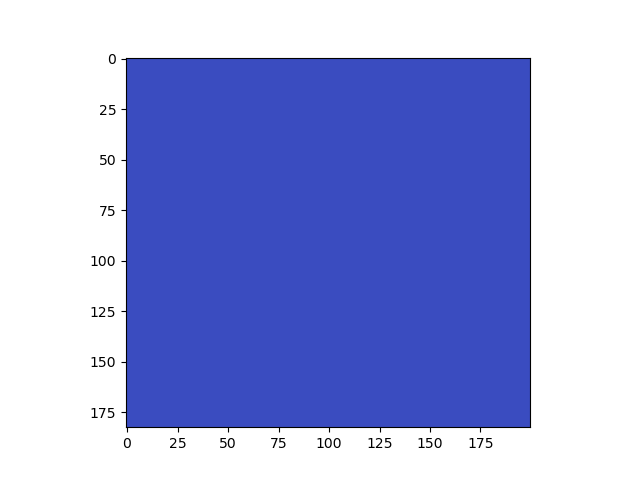

In [25]:
# because we are dealing with vectors, we'll plot the magnitudes
e_field = np.abs(field_array[:,:,0,:])
for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(e_field[:,:,i].T, cmap="coolwarm")
    plt.show()

h_field = np.abs(field_array[:,:,1,:])
for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(h_field[:,:,i].T, cmap="coolwarm")
    plt.show()

<IPython.core.display.Javascript object>


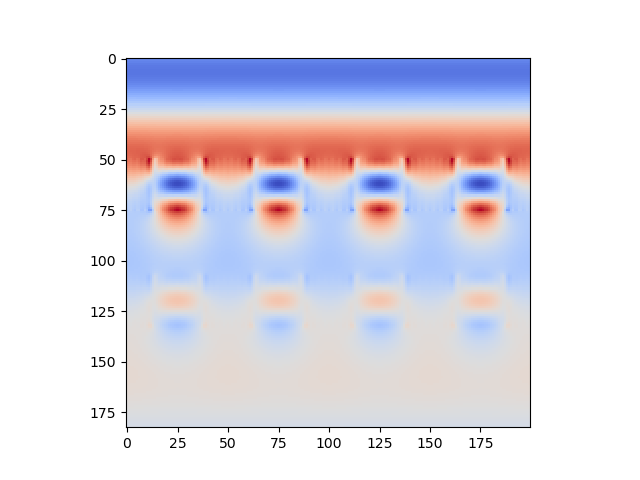

<IPython.core.display.Javascript object>


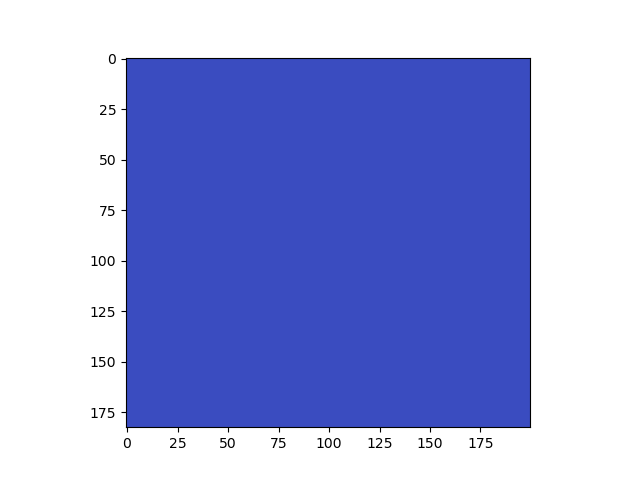

<IPython.core.display.Javascript object>


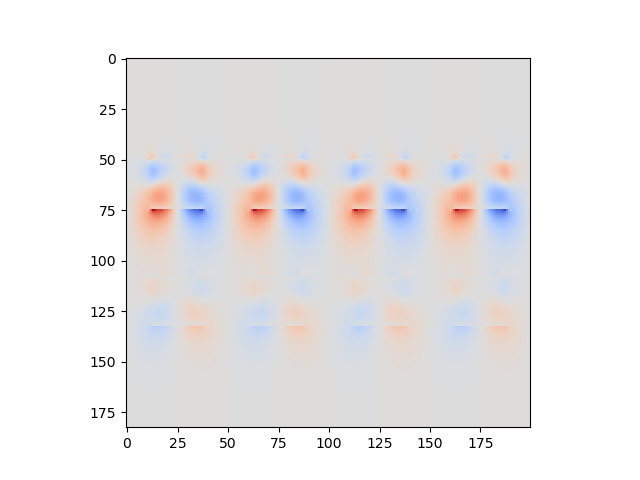

<IPython.core.display.Javascript object>


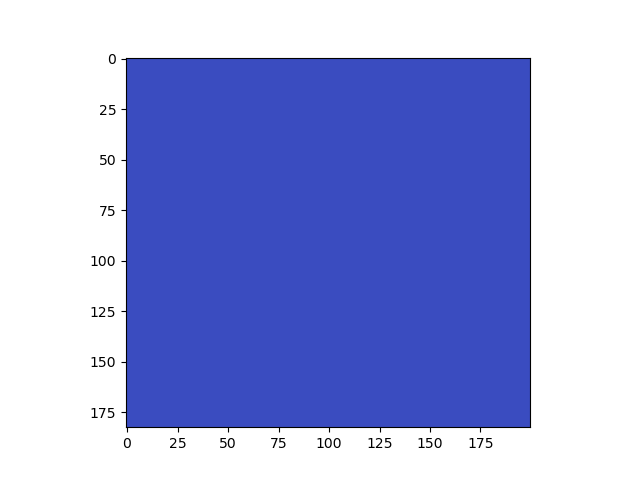

<IPython.core.display.Javascript object>


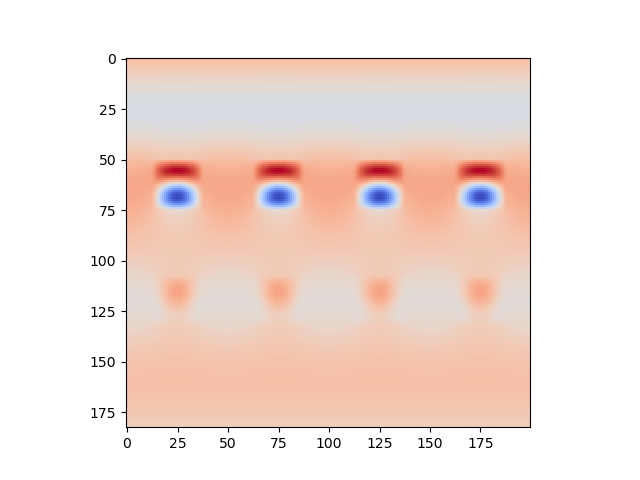

<IPython.core.display.Javascript object>


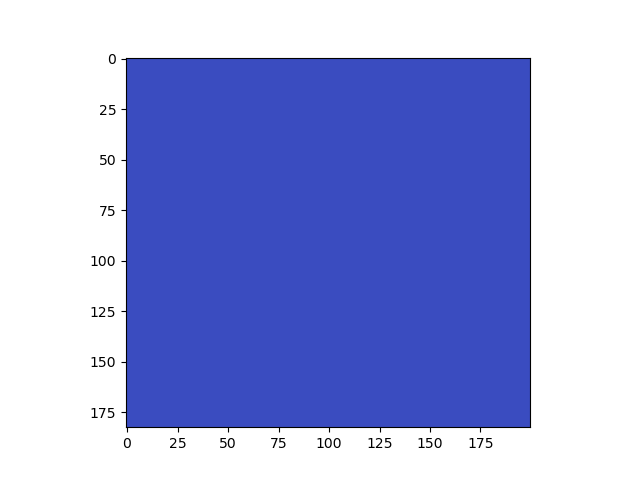

In [28]:
# because we are dealing with vectors, we'll plot the magnitudes
e_field = np.real(field_array[:,:,0,:])
for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(e_field[:,:,i].T, cmap="coolwarm")
    plt.show()

h_field = np.real(field_array[:,:,1,:])
for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(h_field[:,:,i].T, cmap="coolwarm")
    plt.show()